# Ames Housing Data

## Part 1: EDA and Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


## Checking for Null Values

In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
#copied from  stackexchange answer

In [7]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
Pool QC,2042,99.6
Misc Feature,1986,96.8
Alley,1911,93.2
Fence,1651,80.5
Fireplace Qu,1000,48.8
Lot Frontage,330,16.1
Garage Yr Blt,114,5.6
Garage Cond,114,5.6
Garage Qual,114,5.6
Garage Finish,114,5.6


### Based on the data documentation, NA values in categorical values do not correspond to NaN but 'None'. For example, NA in Fireplaces means -- No Fireplaces. This also corresponds to numerical values, where NA fireplaces means there are 0 total fireplaces.

In [8]:
train.fillna(train[['Garage Finish','Alley','Garage Qual','Garage Cond',
                    'Garage Type', 'Fireplace Qu','Bsmt Cond', 'Bsmt Qual', 'Bsmt Exposure', 
                    'BsmtFin Type 1', 'BsmtFin Type 2', 'Misc Feature', 'Fence', 'Pool QC', 'Mas Vnr Type']].fillna('None'),inplace=True)
#this replaces all Ordinal values with 'None'

In [9]:
train.fillna(train[['Bsmt Half Bath','Bsmt Full Bath','BsmtFin SF 1','BsmtFin SF 2',
                    'Bsmt Unf SF','Total Bsmt SF','Mas Vnr Area','Garage Cars',
                    'Garage Area', 'Lot Frontage', 'Garage Yr Blt']].fillna(0),inplace=True)
#this replaces all continous values with 0

<AxesSubplot:>

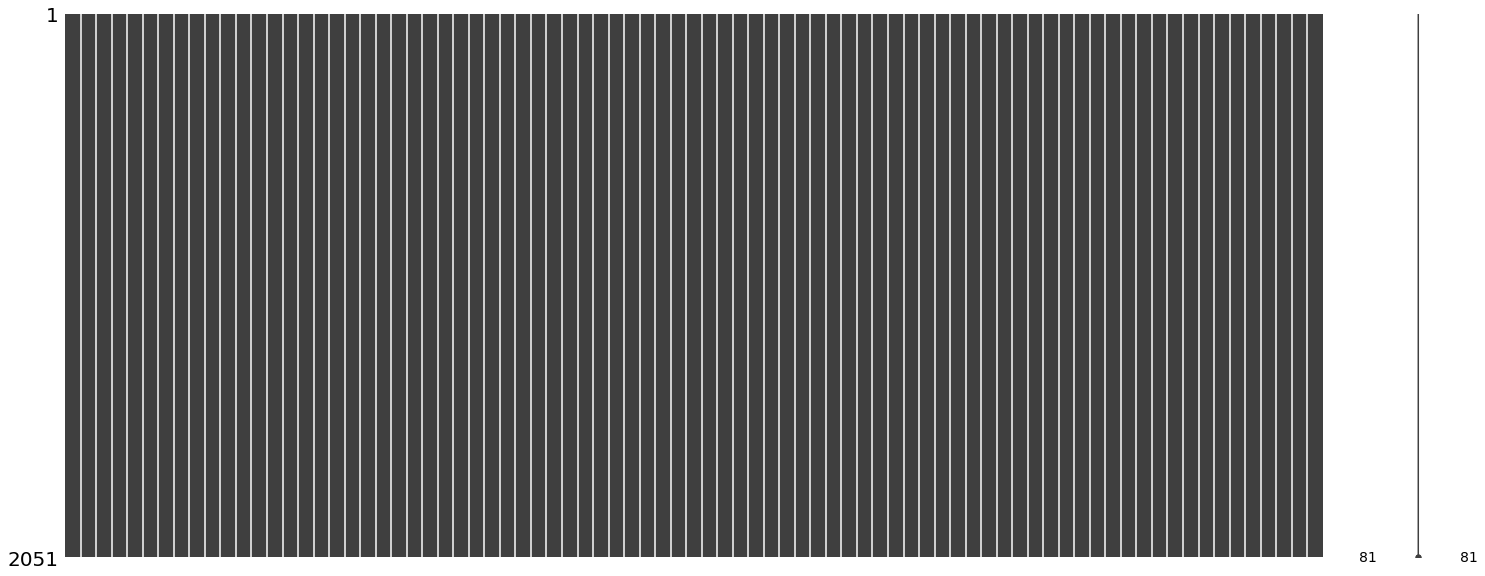

In [10]:
import missingno as msno
msno.matrix(train)
#checking for any other missing values

# Data Visualization and Correlation

<ipython-input-11-c7a1b2d3206a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['SalePrice'] = train['SalePrice']


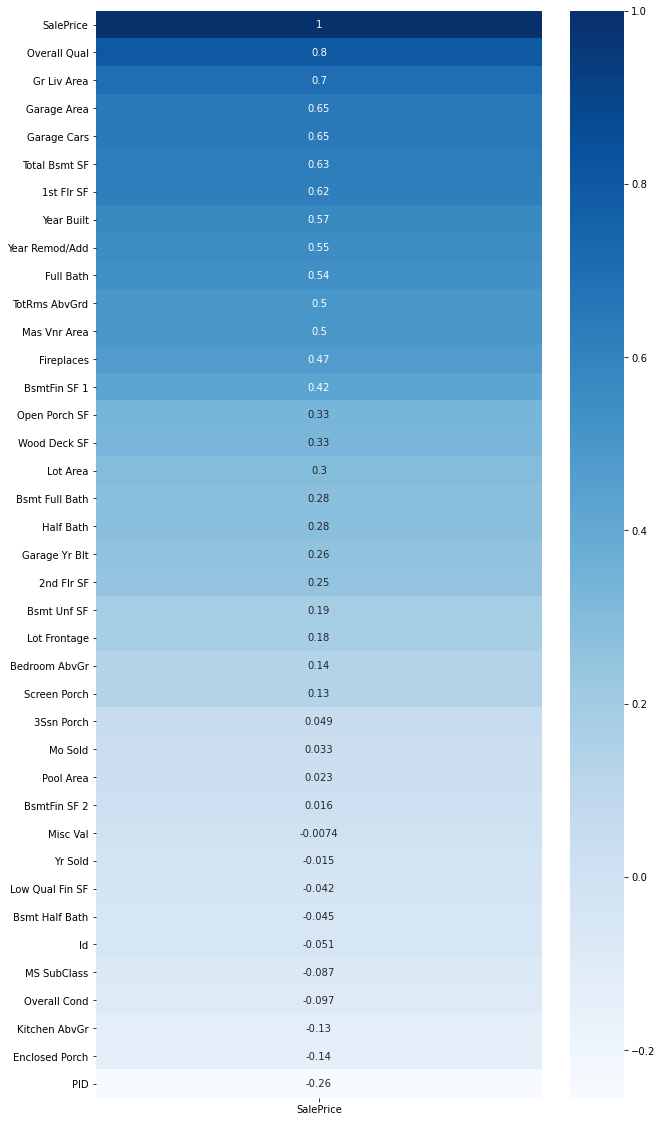

In [11]:
plt.figure(figsize=(10, 20))
features = [col for col in train._get_numeric_data().columns if col != 'SalePrice']
df_features = train[features]
df_features['SalePrice'] = train['SalePrice']
sns.heatmap(df_features.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='Blues');

<AxesSubplot:>

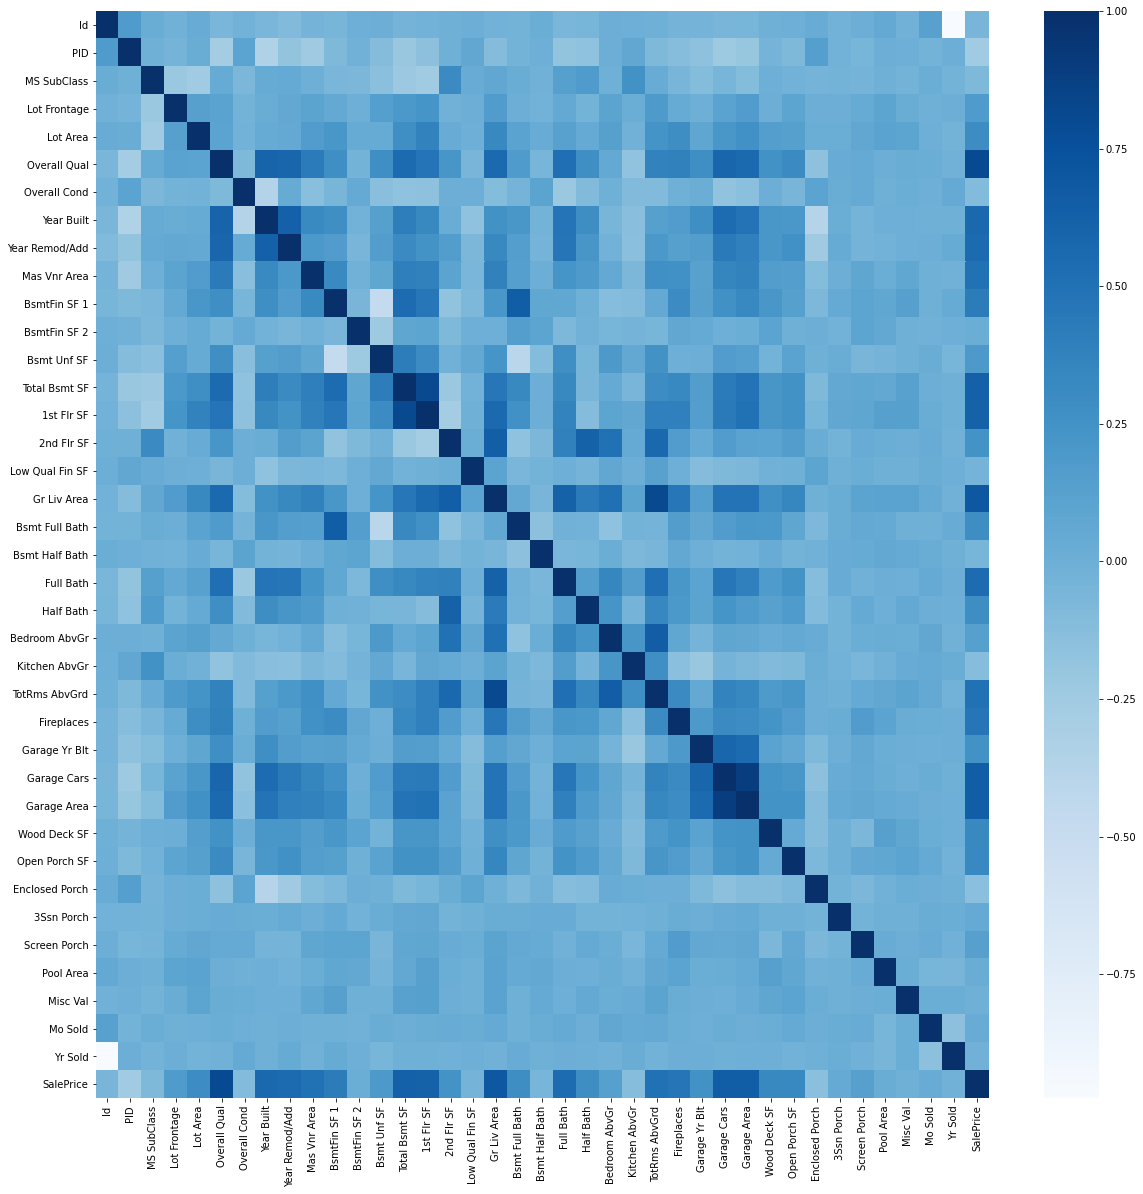

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), cmap = 'Blues')

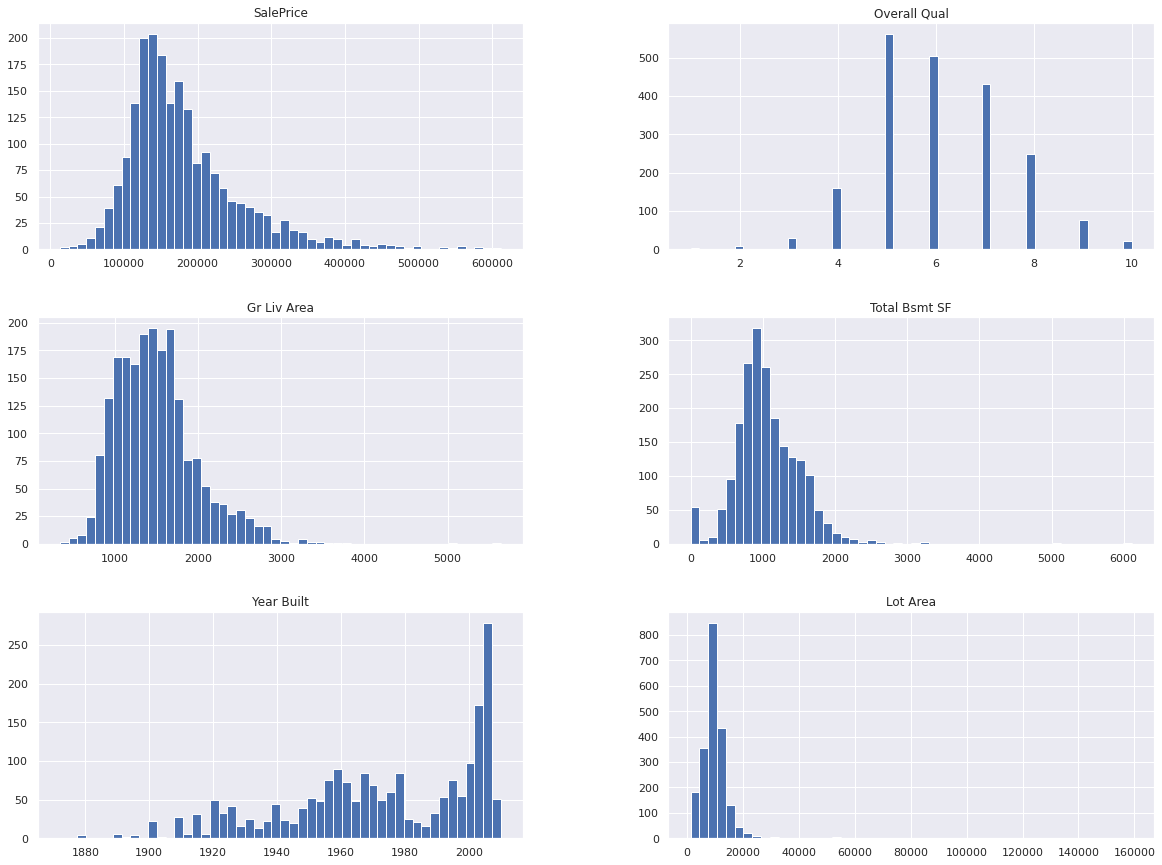

In [13]:
sns.set()
train[['SalePrice', 'Overall Qual', 'Gr Liv Area','Total Bsmt SF', 'Year Built', 'Lot Area']].hist(bins=50, figsize=(20,15))
plt.show();

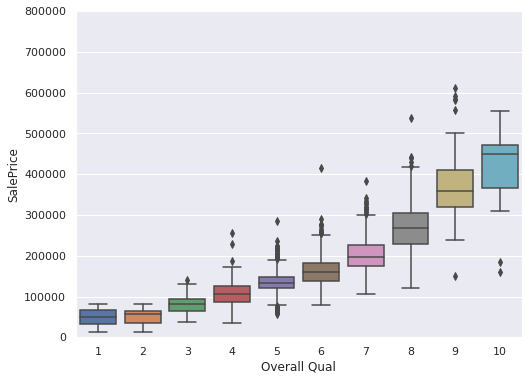

In [14]:
#box plot
sns.set()
data = pd.concat([train['SalePrice'], train['Overall Qual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Overall Qual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

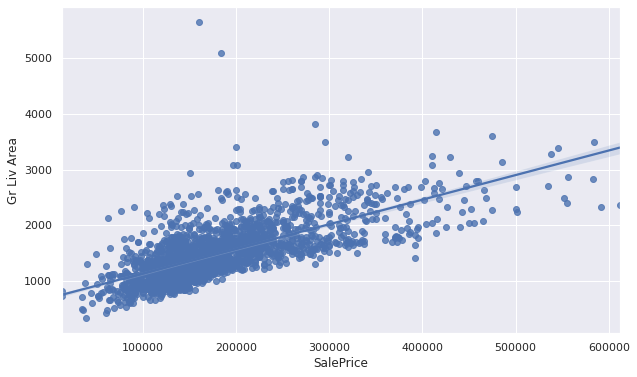

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(x=train['SalePrice'], y=train['Gr Liv Area']);

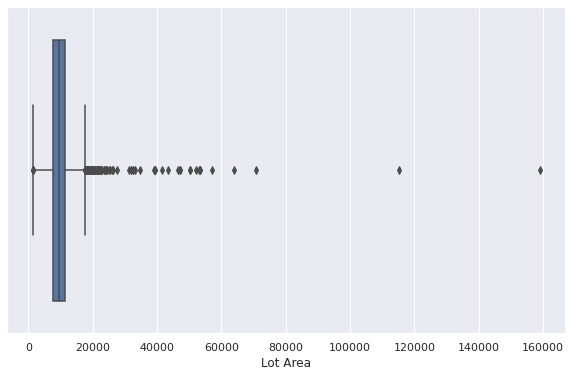

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train['Lot Area']);

# Baseline Model

In [17]:
X = train[features]
y = train['SalePrice']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42,
                                                   test_size = 0.2)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.score(X_train, y_train)

0.8334391281952438

In [22]:
lr.score(X_test, y_test)

0.8669891947546028

In [23]:
cross_val_score(lr, X_train, y_train, cv = 10).mean()

0.7728231359935902

In [24]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [26]:
knn.fit(X_train_sc, y_train)

KNeighborsRegressor()

In [27]:
knn.score(X_train_sc, y_train)

0.8743270776754947

In [28]:
cross_val_score(knn, X_train_sc, y_train, cv = 10).mean()

0.7955862871239047

# Feature Engineering

In [29]:
#In Garage Living Area, we noticed 2 outliers of living area <5000
train.sort_values(by = 'Gr Liv Area', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

In [30]:
#removing any houses with more than 60000 square feet from the data set
train.sort_values(by = 'Lot Area', ascending = False).head(10)
train.drop(train.loc[train['Lot Area'] > 60000].index, inplace=True)

## Pd. get dummies

In [31]:
#converting categorical data into pd.dummies
cols = train.columns
num_cols = train._get_numeric_data().columns
cat = list(set(cols) - set(num_cols))
categorical = pd.get_dummies(train[cat])

In [32]:
df = train[num_cols].join(categorical)

In [33]:
features = [col for col in df._get_numeric_data().columns if col != 'SalePrice']
X2 = df[features]
y2 = df['SalePrice']

In [34]:
X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2,
                                                   random_state = 42,
                                                   test_size = 0.2)

In [35]:
lr2 = LinearRegression()

In [36]:
lr2.fit(X_train2, y_train2)

LinearRegression()

In [37]:
lr2.score(X_test2, y_test2)

0.928971638928622

In [38]:
cross_val_score(lr2, X_train2, y_train2, cv = 10).mean()

0.8652794618856785

In [39]:
y_pred = lr2.predict(X_test2)

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred)

0.928971638928622

## Ordinal Encoder

In [41]:
from sklearn.preprocessing import OrdinalEncoder
test = train.copy()
ord_enc = OrdinalEncoder()
test[cat] = ord_enc.fit_transform(test[cat])

In [42]:
# Overall quality
test["OverallGrade"] = test["Overall Qual"] * test["Overall Cond"]
# Overall quality of garage
test["GarageGrade"] = test["Garage Qual"] * test["Garage Cond"]
# Overall quality of exterior
test["ExterGrade"] = test["Exter Qual"] * test["Exter Cond"]
#  kitchen score
test["KitchenScore"] = test["Kitchen AbvGr"] * test["Kitchen Qual"]
#  fireplace score
test["FireplaceScore"] = test["Fireplaces"] * test["Fireplace Qu"]
#  garage score
test["GarageScore"] = test["Garage Area"] * test["Garage Qual"]
#  pool score
test["PoolScore"] = test["Pool Area"] * test["Pool QC"]
# Total # of bathrooms
test["TotalBath"] = test["Bsmt Full Bath"] + (0.5 * test["Bsmt Half Bath"]) 
+ test["Full Bath"] + (0.5 * test["Half Bath"])
# Total square foot of house
test["AllSF"] = test["Gr Liv Area"] + test["Total Bsmt SF"]
# Total square foot for 1st + 2nd floors
test["AllFlrsSF"] = test["1st Flr SF"] + test["2nd Flr SF"]
# Total square foot of porch
test["AllPorchSF"] = test["Open Porch SF"] + test["Enclosed Porch"] + test["3Ssn Porch"] + test["Screen Porch"]

In [43]:
features = [col for col in test._get_numeric_data().columns if col != 'SalePrice']
X3 = test[features]
y3 = test['SalePrice']

In [44]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3,
                                                   random_state = 42,
                                                   test_size = 0.2)

In [45]:
lr3 = LinearRegression()

In [46]:
lr3.fit(X_train3, y_train3)

LinearRegression()

In [47]:
lr3.score(X_train3, y_train3)

0.8970863766571706

In [48]:
lr3.score(X_test3, y_test3)

0.8791242548562583

In [49]:
cross_val_score(lr3, X_train3, y_train3, cv = 10).mean()

0.851882778270938

In [50]:
y_pred1 = lr3.predict(X_test3)
r2_score(y_test3, y_pred1)

0.8791242548562583

#### It looks like our feature engineering using orbitalencoder did not work to increase the score! Nevertheless, certain columns could be of great use to our current model.

In [51]:
corr_matrix=test.corr()
corr_matrix.SalePrice.sort_values(ascending=False)

SalePrice       1.000000
AllSF           0.806367
Overall Qual    0.802183
AllFlrsSF       0.718369
Gr Liv Area     0.709808
                  ...   
ExterGrade     -0.483162
KitchenScore   -0.550452
Bsmt Qual      -0.580094
Kitchen Qual   -0.635686
Exter Qual     -0.661533
Name: SalePrice, Length: 92, dtype: float64

In [52]:
df_test = df.copy()
# Overall quality of house
df_test["OverallGrade"] = df_test["Overall Qual"] * df_test["Overall Cond"]
# Total number of bathrooms
df_test["TotalBath"] = df_test["Bsmt Full Bath"] + (0.5 * df_test["Bsmt Half Bath"]) + df_test["Full Bath"] + (0.5 * df_test["Half Bath"])
# Total SF for house 
df_test["AllSF"] = df_test["Gr Liv Area"] + df_test["Total Bsmt SF"]
# Total SF for 1st + 2nd floors
df_test["AllFlrsSF"] = df_test["1st Flr SF"] + df_test["2nd Flr SF"]
# Total SF for porch
df_test["AllPorchSF"] = df_test["Open Porch SF"] + df_test["Enclosed Porch"] + df_test["3Ssn Porch"] + df_test["Screen Porch"]

In [53]:
features = [col for col in df_test._get_numeric_data().columns if col != 'SalePrice']
X4 = df_test[features]
y4 = df_test['SalePrice']

X_train4, X_test4, y_train4, y_test4= train_test_split(X4, y4,
                                                   random_state = 42,
                                                   test_size = 0.2)

In [54]:
lr4 = LinearRegression()

In [55]:
lr4.fit(X_train4, y_train4)

LinearRegression()

In [56]:
cross_val_score(lr4, X_train4, y_train4, cv = 10).mean()

0.8658618360566253

In [57]:
lr4.score(X_train4, y_train4)

0.9434952538303766

In [58]:
lr4.score(X_test4, y_test4)

0.9297095485354465

In [59]:
y_pred2 = lr4.predict(X_test4)
r2_score(y_test4, y_pred2)

0.9297095485354465

#### It looks like adding more features only slightly increased the accuracy of the model. However, this is good. We can now, finally, scale our data and enter it into the pipeline with GridSearchCV

# Using GridSearchCV to Find the Best Model

In [60]:
train = df_test.copy()
#initialize train as main dataframe

In [61]:
# Set up X and y.
features = [col for col in train._get_numeric_data().columns if col != 'SalePrice']
X = train[features]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

## KNN

In [62]:
#scaling the data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [63]:
knn = KNeighborsRegressor()

In [64]:
# Let's try 3-NN, 5-NN, 10-NN.
neighbors_to_test = [3, 5, 10, 15, 25, 50]

# Let's try uniform and distance weightings.
weightings_to_test = ['uniform', 'distance']

# Let's try Manhattan and Euclidean distances.
distance_metrics_to_test = [1, 2] # Remember that p = 1 is Manhattan, p = 2 is Euclidean

# Instantiate a dictionary to hold our accuracy scores.
accuracies = {}

# Loop through number of neighbors.
for k in neighbors_to_test:
    
    # Loop through the weightings.
    for w in weightings_to_test:
        
        # Loop through our distance metrics.
        for d in distance_metrics_to_test:
            
            # Fit a KNN model with that set of hyperparameters.
            knn = KNeighborsRegressor(n_neighbors=k, weights=w, p=d)
            
            # Generate a set of accuracy scores based on 5-fold cross-validation.
            cv_accuracies = cross_val_score(knn, X_train_sc, y_train, cv=5)
            
            # Average the five accuracy scores and store them in the dictionary.
            accuracies[(k, w, d)] = np.mean(cv_accuracies)

In [65]:
accuracies

{(3, 'uniform', 1): 0.8093480495263338,
 (3, 'uniform', 2): 0.7515261986477347,
 (3, 'distance', 1): 0.8131624457507118,
 (3, 'distance', 2): 0.7545716361506388,
 (5, 'uniform', 1): 0.8080315785331018,
 (5, 'uniform', 2): 0.7718913982540782,
 (5, 'distance', 1): 0.8137850720982556,
 (5, 'distance', 2): 0.7751487287810173,
 (10, 'uniform', 1): 0.8075154779188141,
 (10, 'uniform', 2): 0.7788865119410492,
 (10, 'distance', 1): 0.8124233312659882,
 (10, 'distance', 2): 0.7819795814529289,
 (15, 'uniform', 1): 0.8026894882542613,
 (15, 'uniform', 2): 0.7819699476946305,
 (15, 'distance', 1): 0.8078312602614319,
 (15, 'distance', 2): 0.7849156411232009,
 (25, 'uniform', 1): 0.7945651768762643,
 (25, 'uniform', 2): 0.7741922751762674,
 (25, 'distance', 1): 0.8009754304575661,
 (25, 'distance', 2): 0.7786810570169479,
 (50, 'uniform', 1): 0.7711257522901176,
 (50, 'uniform', 2): 0.7386781569799685,
 (50, 'distance', 1): 0.7797590835774315,
 (50, 'distance', 2): 0.745303871380851}

## Linear Regression

In [66]:
lin = LinearRegression()

In [67]:
lin.fit(X_train, y_train)

LinearRegression()

In [68]:
cross_val_score(lin, X_train, y_train, cv=10, scoring='r2').mean()

0.8658618360566253

In [69]:
y_pred = lin.predict(X_test)

In [70]:
r2_score(y_pred, y_test)

0.9287813667406237

## Ridge

In [71]:
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train_sc,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [72]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train_sc, y_train)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.8461929233196559
STD:  0.08534863071319852




In [73]:
from sklearn.model_selection import GridSearchCV
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_sc, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Best Score:  0.8808062152143575
Best Params:  {'alpha': 1000}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.9s finished


In [74]:
y_pred = grid.best_estimator_.predict(X_test_sc)

In [75]:
r2_score(y_pred, y_test)

0.9166589310215458

## Lasso

In [76]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train_sc, y_train)
# get cross val scores
get_cv_scores(lasso)

/home/wizard/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106243673813.66443, tolerance: 1010966520.2783903
  model = cd_fast.enet_coordinate_descent(
/home/wizard/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118980382457.93936, tolerance: 803947806.1335258
  model = cd_fast.enet_coordinate_descent(
/home/wizard/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86328320157.37164, tolerance: 820784161.5705669
  model = cd_fast.enet_coordinate_descent(
/home/wizard/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinat

CV Mean:  0.8418855837626236
STD:  0.08404789405975142




/home/wizard/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171053549426.13074, tolerance: 798057133.4926158
  model = cd_fast.enet_coordinate_descent(
/home/wizard/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141267031875.61774, tolerance: 809129707.394895
  model = cd_fast.enet_coordinate_descent(


In [77]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_sc, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.3s finished


Best Score:  0.8815344823733025
Best Params:  {'alpha': 1000}


In [78]:
y_pred = grid.best_estimator_.predict(X_test_sc)

In [79]:
r2_score(y_pred, y_test)

0.9266514247297433

## ElasticNet

In [80]:
from sklearn.linear_model import ElasticNet
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train_sc, y_train)
# get cross val scores
get_cv_scores(elastic_net)

CV Mean:  0.8823561451068086
STD:  0.04629357562284698




In [81]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_sc, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   13.4s


Best Score:  0.8823561451068086
Best Params:  {'alpha': 1, 'l1_ratio': 0.5}


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   17.8s finished


In [82]:
y_pred = grid.best_estimator_.predict(X_test_sc)
r2_score(y_pred, y_test)

0.9206010670704287

In [83]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)
rms

21179.65963484576

#### And the winner is..

#### Elastic Net using {'alpha': 1, 'l1_ratio': 0.5}. With a cross-validated score of 0.8823!

In [84]:
test = pd.read_csv('datasets/test.csv')

In [85]:
test.fillna(test[['Garage Finish','Alley','Garage Qual','Garage Cond',
                    'Garage Type', 'Fireplace Qu','Bsmt Cond', 'Bsmt Qual', 'Bsmt Exposure', 
                    'BsmtFin Type 1', 'BsmtFin Type 2', 'Misc Feature', 'Fence', 'Pool QC', 'Mas Vnr Type']].fillna('None'),inplace=True)
#this replaces all Ordinal values with 'None'

test.fillna(test[['Bsmt Half Bath','Bsmt Full Bath','BsmtFin SF 1','BsmtFin SF 2',
                    'Bsmt Unf SF','Total Bsmt SF','Mas Vnr Area','Garage Cars',
                    'Garage Area', 'Lot Frontage', 'Garage Yr Blt']].fillna(0),inplace=True)
#this replaces all continous values with 0

In [86]:
#converting categorical data into pd.dummies
cols = test.columns
num_cols = test._get_numeric_data().columns
cat = list(set(cols) - set(num_cols))
categorical = pd.get_dummies(test[cat])

In [87]:
test = test[num_cols].join(categorical)

In [88]:
# Get missing columns in the training test
missing_cols = set( train.columns ) - set( test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test[train.columns]

In [89]:
#scaling the data
test_sc = ss.fit_transform(test[features])

In [90]:
predicted_prices = grid.best_estimator_.predict(test_sc)

In [91]:
submission2 = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})

In [92]:
submission2.to_csv('submission2.csv', index=False)